In [1]:
import numpy as np


#加载数据
def load_data():
    with open('简单分类数据.txt') as fr:
        lines = fr.readlines()

    x = np.empty((len(lines), 2), dtype=float)
    y = np.empty(len(lines), dtype=float)

    for i in range(len(lines)):
        line = lines[i].strip().split('\t')
        x[i] = line[:2]
        y[i] = line[2]

    return x, y


x, y = load_data()
x[:5], y[:5]

(array([[-0.017612, 14.053064],
        [-1.395634,  4.662541],
        [-0.752157,  6.53862 ],
        [-1.322371,  7.152853],
        [ 0.423363, 11.054677]]),
 array([-1.,  1., -1., -1., -1.]))

In [2]:
N, M = x.shape
w = np.ones(2)
b = 0.0

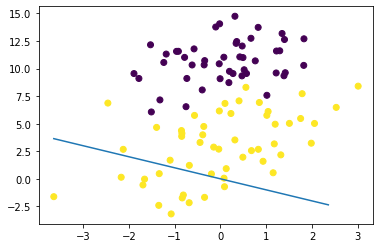

In [3]:
import matplotlib.pyplot as plt


#把线画出来,线就是wx + b = 0
def draw():
    X = np.arange(x[:, 0].min(), x[:, 0].max(), 1)
    Y = np.empty([len(X)])
    for i in range(len(X)):
        Y[i] = (-w[0] * X[i] - b) / w[1]

    plt.scatter(x[:, 0], x[:, 1], c=y)
    plt.plot(X, Y)

    plt.show()


draw()

In [4]:
def predict(x):
    z = w.dot(x) + b
    return 1 / (1 + np.exp(-z))


predict(x[0])

0.999999197434851

In [5]:
def get_loss():
    loss = 0
    for i in range(N):
        if y[i] == 1:
            #当y是1时,我希望predict(x[i])越大越好
            loss += np.log(predict(x[i]))

        if y[i] == -1:
            #当y是-1时,我希望1-predict(x[i])越大越好
            loss += np.log(1 - predict(x[i]))
            
    #写成书上的公式,这和上面的写法其实是一样的.
    loss = 0
    for i in range(N):
        p = predict(x[i])
        d = 1 if y[i] == 1 else 0
        loss += d * np.log(p) + (1 - d) * np.log(1 - p)

    return loss


get_loss()

-540.4081260783354

In [6]:
#暴力求梯度法
def gradient():
    global w
    global b
    upsilon = 1e-2

    l1 = get_loss()
    w[0] += upsilon
    l2 = get_loss()
    w[0] -= upsilon
    gradient_w0 = (l2 - l1) / upsilon

    w[1] += upsilon
    l2 = get_loss()
    w[1] -= upsilon
    gradient_w1 = (l2 - l1) / upsilon

    b += upsilon
    l2 = get_loss()
    b -= upsilon
    gradient_b = (l2 - l1) / upsilon

    return np.array([gradient_w0, gradient_w1]), gradient_b


gradient()

(array([ -19.34439272, -510.07213195]), -33.286852351091056)

In [7]:
#训练
for i in range(100):
    g_w, g_b = gradient()
    w += g_w * 1e-2
    b += g_b * 1e-1

    if i % 10 == 0:
        print(get_loss())

-849.7506395767857
-9.85351358926892
-103.73703332631135
-28.9351102653891
-12.89001666735565
-9.35218572999099
-9.32529120124075
-9.323731446383107
-9.324079875559004
-9.325080903063883


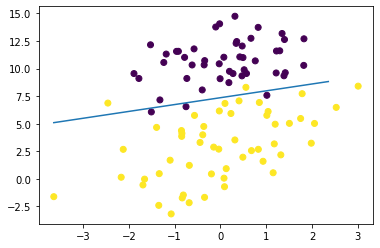

In [8]:
draw()